In [0]:
import cv2
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
path = 'gdrive/My Drive/colab/dlcv_marathon/'
os.chdir(path)

In [0]:
import cv2
import numpy as np

img = cv2.imread('./data/lena.png')

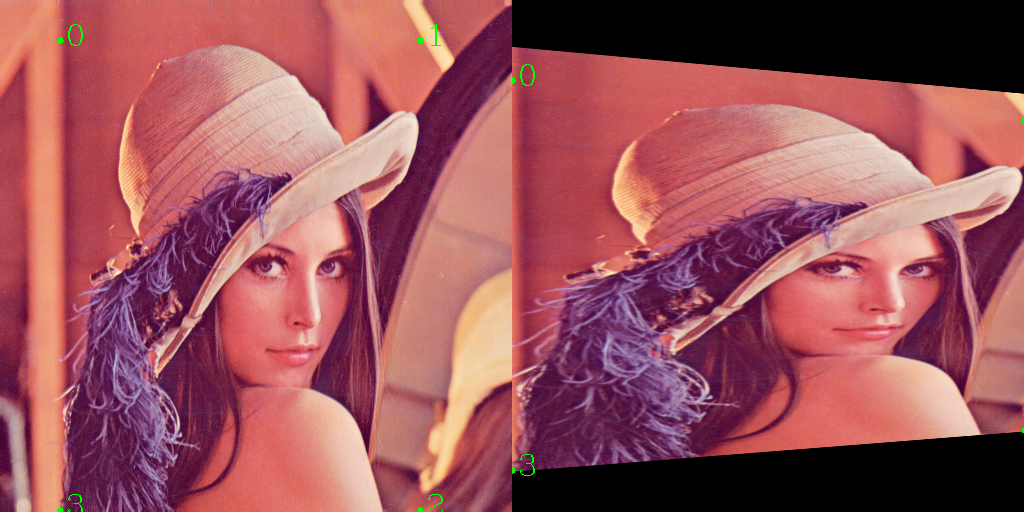

In [10]:
img_perspective = img.copy()
h, w = img.shape[:2]

# 設定四對點，並取得 perspective 矩陣
point1 = np.array([[60, 40], [420, 40], [420, 510], [60, 510]], dtype=np.float32)
point2 = np.array([[0, 80], [w, 120], [w, 430], [0, 470]], dtype=np.float32)
M = cv2.getPerspectiveTransform(point1, point2)

# perspective 轉換
img_perspective = cv2.warpPerspective(img, M, (w, h))

# 在圖片上標記點
img_copy = img.copy()
for idx, pts in enumerate(point1):
    # map(function, iterable, ...) Apply function to every item of iterable and return a list of the results, similar to R's apply.
    # The int() function converts the specified value into an integer number.
    pts = tuple(map(int, pts))
    # cv2.circle(img, center, radius, color, thickness=1, lineType=8, shift=0)
    cv2.circle(img_copy, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_copy, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

for idx, pts in enumerate(point2):
    pts = tuple(map(int, pts))
    cv2.circle(img_perspective, pts, 3, (0, 255, 0), -1)
    cv2.putText(img_perspective, str(idx), (pts[0]+5, pts[1]+5), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

# 組合 + 顯示圖片
img_show = np.hstack((img_copy, img_perspective))
cv2_imshow(img_show)